In [9]:
#load modules
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd # conda install --channel conda-forge geopandas
import numpy as np, pandas as pd, geopandas as gpd
import matplotlib.pyplot as plt
import shapely.vectorized

In [10]:
# Load .NC Dataset CHIRPS-2.0 Global Monthly NETCDF

In [5]:
x = np.arange(-74.8, -71.9, 0.01)
y = np.arange(4.5, 7.3, 0.01)
xx, yy = np.meshgrid(x, y)
xnorm = (xx - xx.min()) / (xx.max() - xx.min())
ynorm = (yy - yy.min()) / (yy.max() - yy.min())
v = np.cos((xnorm * 2 - 1) * np.pi) + np.sin((ynorm * 2 - 1) * np.pi)

# load chirps precipitation data
chirps = xr.open_dataset('/media/engricardoperez/Archivos/chirps-v2.0.monthly.nc')

# select precipitation variable
pr = chirps['precip']

# select boundaries (xmin, xmax, ymin and ymax) and time period of interest
pr_boyaca = pr.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3),time=slice('1981-01-01','1981-01-01')) #time=slice('1981','2020'))
print(pr_boyaca)

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 506)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-02-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2023-03-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    we

In [6]:
print(chirps)

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 506)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-02-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2023-03-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    we

In [4]:
print(v)

[[-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]
 [-1.02251847 -1.02228214 -1.02157327 ... -1.02157327 -1.02228214
  -1.02251847]
 [-1.04502553 -1.0447892  -1.04408032 ... -1.04408032 -1.0447892
  -1.04502553]
 ...
 [-0.95497447 -0.95473814 -0.95402927 ... -0.95402927 -0.95473814
  -0.95497447]
 [-0.97748153 -0.9772452  -0.97653632 ... -0.97653632 -0.9772452
  -0.97748153]
 [-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]]


In [5]:
# convert xarray to geopandas
df = pr_boyaca.to_dataframe().reset_index()
gdf_precip = gpd.GeoDataFrame(df.precip, geometry=gpd.points_from_xy(df.longitude,df.latitude))

gdf_lowres = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_boyaca = gpd.read_file('/media/engricardoperez/Archivos/depto/boyaca.shp')#, crs="epsg:4326")

(4.495, 7.29499999999994)

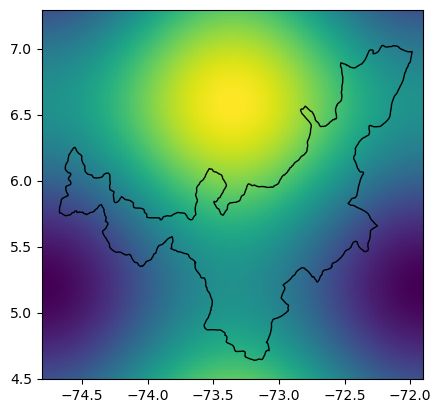

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, v)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [7]:
gdf_boyaca.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.20951 7.02466, -72.20261 7.02176..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       3248 non-null   datetime64[ns]
 1   latitude   3248 non-null   float64       
 2   longitude  3248 non-null   float64       
 3   precip     3248 non-null   float32       
dtypes: datetime64[ns](1), float32(1), float64(2)
memory usage: 88.9 KB


In [9]:
gdf_precip.head()

,precip,geometry
0,59.656879,POINT (-74.77500 4.52500)
1,55.540077,POINT (-74.72501 4.52500)
2,51.964622,POINT (-74.67500 4.52500)
3,60.566013,POINT (-74.62501 4.52500)
4,60.152557,POINT (-74.57500 4.52500)


In [10]:
gdf_lowres.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


(4.495, 7.29499999999994)

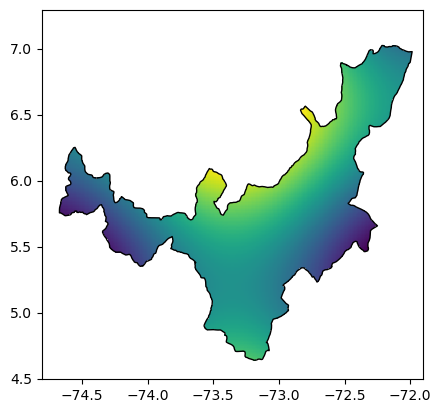

In [11]:
mask = shapely.vectorized.contains(gdf_boyaca.dissolve().geometry.item(), xx, yy)

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, np.where(mask, v, np.nan))
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
#gdf_lowres.plot(ax=ax, color='blue', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [12]:
vv = df.to_numpy()

In [13]:
print(vv)

[[Timestamp('1981-01-01 00:00:00') 4.524997711181641 -74.7750015258789
  59.65687942504883]
 [Timestamp('1981-01-01 00:00:00') 4.524997711181641 -74.72500610351562
  55.540077209472656]
 [Timestamp('1981-01-01 00:00:00') 4.524997711181641 -74.67500305175781
  51.964622497558594]
 ...
 [Timestamp('1981-01-01 00:00:00') 7.274997711181641 -72.0250015258789
  33.32612991333008]
 [Timestamp('1981-01-01 00:00:00') 7.274997711181641 -71.97500610351562
  32.250003814697266]
 [Timestamp('1981-01-01 00:00:00') 7.274997711181641 -71.92500305175781
  32.565895080566406]]


In [14]:
print(df)

           time  latitude  longitude     precip
0    1981-01-01  4.524998 -74.775002  59.656879
1    1981-01-01  4.524998 -74.725006  55.540077
2    1981-01-01  4.524998 -74.675003  51.964622
3    1981-01-01  4.524998 -74.625008  60.566013
4    1981-01-01  4.524998 -74.575005  60.152557
...         ...       ...        ...        ...
3243 1981-01-01  7.274998 -72.125008  29.612566
3244 1981-01-01  7.274998 -72.075005  35.305779
3245 1981-01-01  7.274998 -72.025002  33.326130
3246 1981-01-01  7.274998 -71.975006  32.250004
3247 1981-01-01  7.274998 -71.925003  32.565895

[3248 rows x 4 columns]


In [39]:
x_1 = df.longitude
y_1 = df.latitude
xx_1, yy_1 = np.meshgrid(x_1, y_1) # 3248 * 3248 to matrix
xnorm_1 = (xx_1 - xx_1.min()) / (xx_1.max() - xx_1.min()) # [0:1]
ynorm_1 = (yy_1 - yy_1.min()) / (yy_1.max() - yy_1.min()) # [0:1]
vv = df['precip'].to_numpy().reshape((3248))

In [51]:
vv = v

In [58]:
print(vv)
vv.shape

[[-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]
 [-1.02251847 -1.02228214 -1.02157327 ... -1.02157327 -1.02228214
  -1.02251847]
 [-1.04502553 -1.0447892  -1.04408032 ... -1.04408032 -1.0447892
  -1.04502553]
 ...
 [-0.95497447 -0.95473814 -0.95402927 ... -0.95402927 -0.95473814
  -0.95497447]
 [-0.97748153 -0.9772452  -0.97653632 ... -0.97653632 -0.9772452
  -0.97748153]
 [-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]]


(280,)

In [59]:
x_1.shape

(3248,)

In [60]:
y_1.shape

(3248,)

In [61]:
x.shape

(290,)

In [62]:
y.shape

(280,)

In [34]:
print(v)

[[-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]
 [-1.02251847 -1.02228214 -1.02157327 ... -1.02157327 -1.02228214
  -1.02251847]
 [-1.04502553 -1.0447892  -1.04408032 ... -1.04408032 -1.0447892
  -1.04502553]
 ...
 [-0.95497447 -0.95473814 -0.95402927 ... -0.95402927 -0.95473814
  -0.95497447]
 [-0.97748153 -0.9772452  -0.97653632 ... -0.97653632 -0.9772452
  -0.97748153]
 [-1.         -0.99976367 -0.9990548  ... -0.9990548  -0.99976367
  -1.        ]]


In [30]:
print(xnorm_1)

[[0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]
 [0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]
 [0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]
 ...
 [0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]
 [0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]
 [0.         0.01754226 0.0350872  ... 0.9649128  0.98245506 1.        ]]


In [40]:
print(xx_1)

[[-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]
 [-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]
 [-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]
 ...
 [-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]
 [-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]
 [-74.77500153 -74.7250061  -74.67500305 ... -72.02500153 -71.9750061
  -71.92500305]]


In [41]:
print(yy_1)

[[4.52499771 4.52499771 4.52499771 ... 4.52499771 4.52499771 4.52499771]
 [4.52499771 4.52499771 4.52499771 ... 4.52499771 4.52499771 4.52499771]
 [4.52499771 4.52499771 4.52499771 ... 4.52499771 4.52499771 4.52499771]
 ...
 [7.27499771 7.27499771 7.27499771 ... 7.27499771 7.27499771 7.27499771]
 [7.27499771 7.27499771 7.27499771 ... 7.27499771 7.27499771 7.27499771]
 [7.27499771 7.27499771 7.27499771 ... 7.27499771 7.27499771 7.27499771]]


TypeError: Dimensions of C (280, 290) should be one smaller than X(3248) and Y(3248) while using shading='flat' see help(pcolormesh)

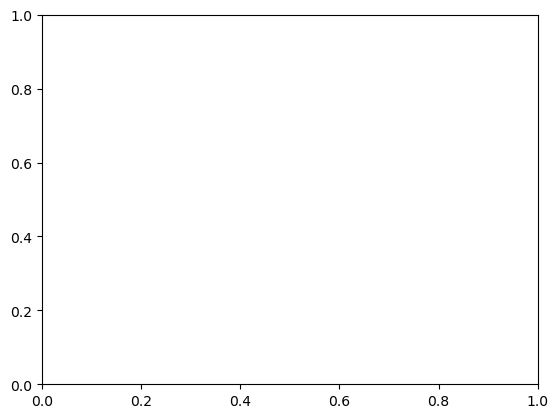

In [56]:
fig, ax = plt.subplots()
ax.pcolormesh(xx_1, yy_1, vv)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)